In [25]:
import pandas as pd
import sklearn  # machine learning library for Python
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [26]:
columns = ["class", "age", "menopause","tumor_size", "inv_nodes", "node_caps", "deg_malig", "breast", "breast_quad", "irradiat"]
cancer_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data',names=columns, delimiter=",", header=None)



In [27]:
cancer_data.head()


,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [28]:
print(cancer_data.isna().sum())
cancer_data = cancer_data.dropna()
class_var = 'class'
class_counts = cancer_data[class_var].value_counts()
print(class_counts)


              

class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64
no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64


In [29]:
print(cancer_data['class'].value_counts())
print("----------------------------------")
print(cancer_data['age'].value_counts())
print("----------------------------------")
print(cancer_data['menopause'].value_counts())
print("----------------------------------")
print(cancer_data['tumor_size'].value_counts())
print("----------------------------------")
print(cancer_data['inv_nodes'].value_counts())
print("----------------------------------")
print(cancer_data['node_caps'].value_counts())
print("----------------------------------")
print(cancer_data['deg_malig'].value_counts())
print("----------------------------------")
print(cancer_data['breast'].value_counts())
print("----------------------------------")
print(cancer_data['breast_quad'].value_counts())
print("----------------------------------")
print(cancer_data['irradiat'].value_counts())








no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64
----------------------------------
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64
----------------------------------
premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64
----------------------------------
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor_size, dtype: int64
----------------------------------
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv_nodes, dtype: int64
----------------------------------
no     222
yes     56
?        8
Name: node_caps, dtype: int64
----------------------------------
2    130
3     85
1     71
Name: deg_malig, dtype: int64
----------------------------------
left     152
right    134
Name: breast, dtype: int64
----------------------------------
left_low  

Text(0, 0.5, 'Frequency')

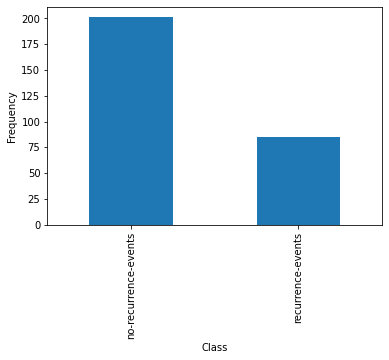

In [30]:
cancer_data['class'].value_counts().plot.bar()
plt.xlabel('Class')
plt.ylabel('Frequency')

Confusion Matrix Tree: 
 [[34 12]
 [ 5  7]] 

The Accuracy for Tree is:  0.7068965517241379
The precision for Tree is  0.3684210526315789
The recall for Tree is  0.5833333333333334 



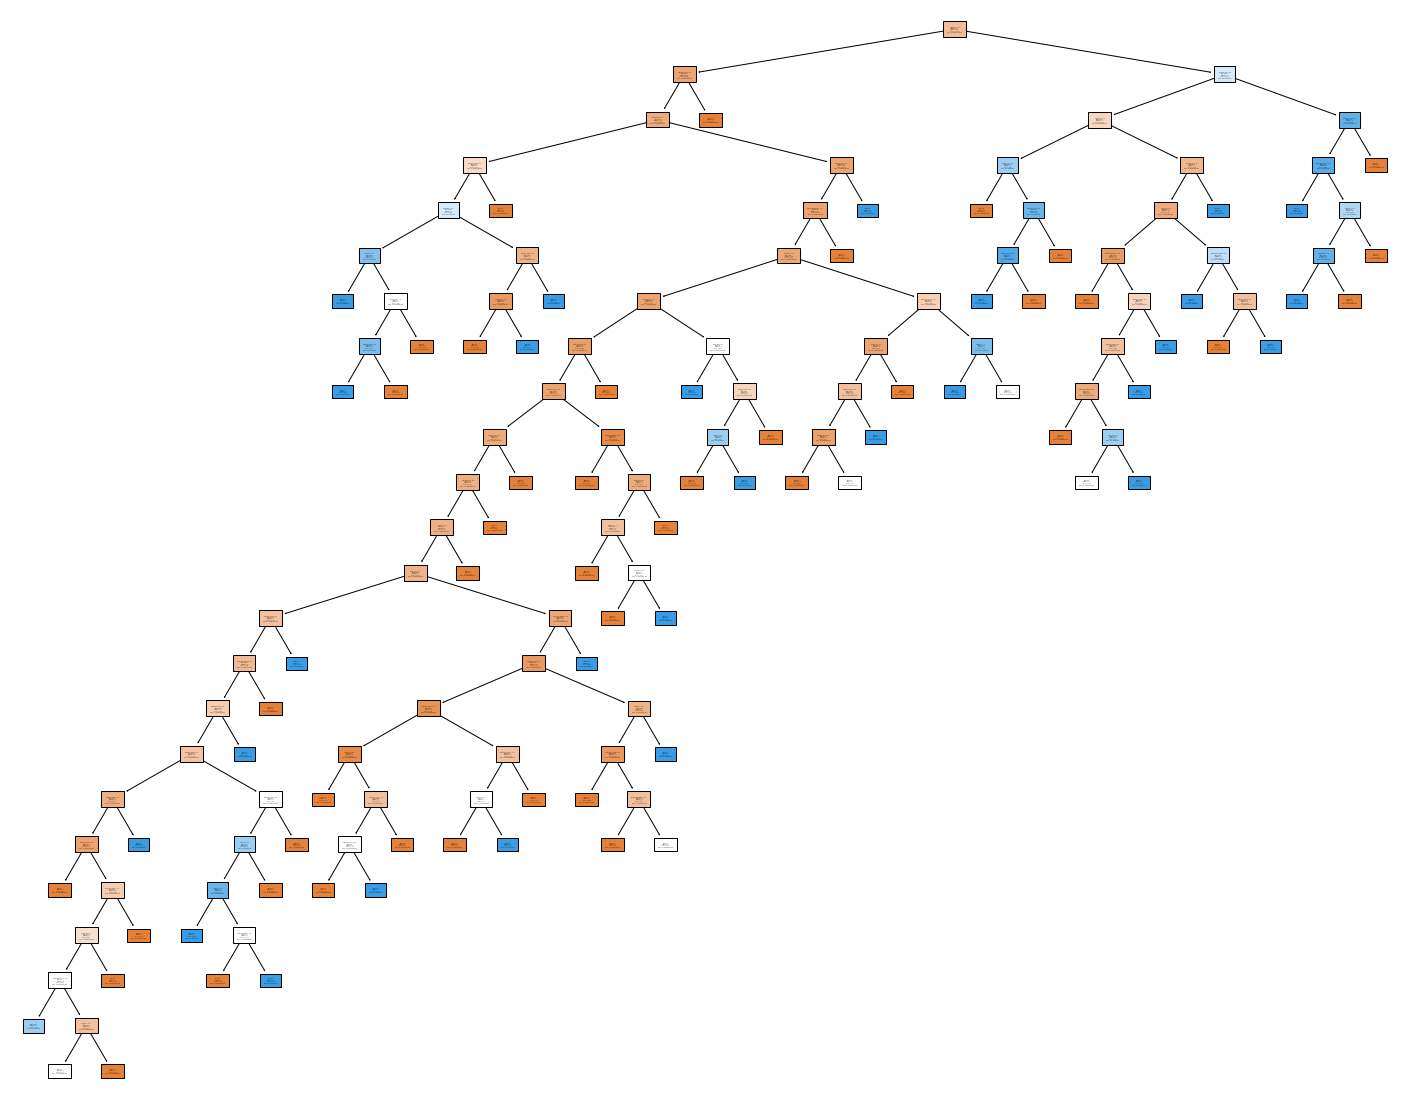

In [31]:
X = cancer_data.drop("class", axis=1)
y = cancer_data["class"]


X = pd.get_dummies(X, columns=['age','menopause','tumor_size', 'inv_nodes', 'node_caps', 'breast', 'breast_quad', 'irradiat'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
y_test_predict = dtree.predict(X_test)

print("Confusion Matrix Tree: \n", confusion_matrix(y_test, y_test_pred),"\n")
print("The Accuracy for Tree is: ", accuracy_score(y_test, y_test_pred))
print("The precision for Tree is ",precision_score(y_test, y_test_pred, pos_label="recurrence-events")) 
print("The recall for Tree is ",recall_score(y_test, y_test_pred, pos_label="recurrence-events"),"\n")  

fig = plt.figure(figsize=(25,20))
plot_tree(dtree, feature_names=X.columns, class_names=['no-recurrence-events', 'recurrence-events'], filled=True, fontsize=0)
plt.show()







Accuracy: 0.7758620689655172
Confusion Matrix:
 [[39  6]
 [ 7  6]]
Precision: 0.5
Recall: 0.46153846153846156


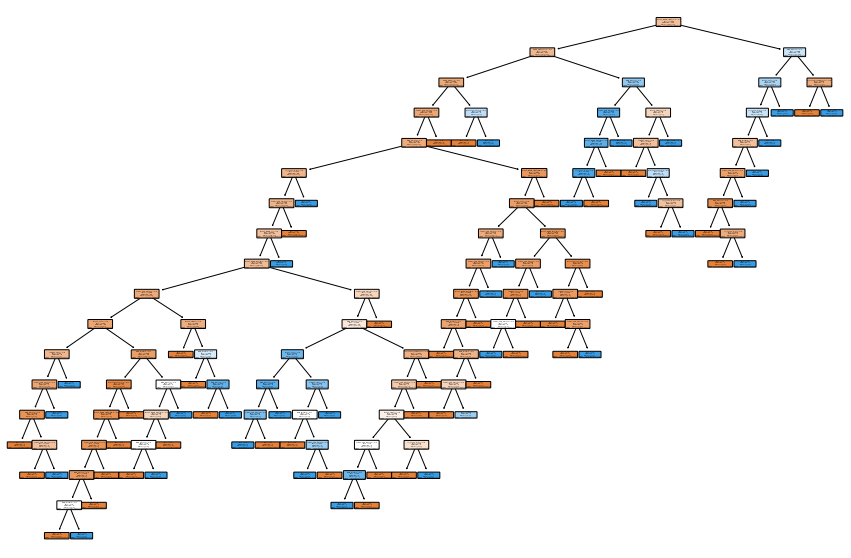

In [32]:

# Split the data into features (X) and target (y)
X = cancer_data.drop('class', axis=1)
y = cancer_data['class']

X = pd.get_dummies(X, columns=['age','menopause','tumor_size', 'inv_nodes', 'node_caps', 'breast', 'breast_quad', 'irradiat'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
precision = precision_score(y_test, y_pred, pos_label="recurrence-events")
recall = recall_score(y_test, y_pred, pos_label="recurrence-events")
print("Precision:", precision)
print("Recall:", recall)



fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X.columns,
          class_names=['no-recurrence-events', 'recurrence-events'], 
          filled=True, impurity=True, 
          rounded=True)
plt.show()





In [33]:
print(cancer_data["class"].value_counts())

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64


In [34]:
#use SMOTE to balance data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(pd.Series(y_res).value_counts())


recurrence-events       156
no-recurrence-events    156
Name: class, dtype: int64


Confusion Matrix Tree: 
 [[35  8]
 [ 8  7]] 

The Accuracy for Tree is:  0.7241379310344828
The precision for Tree is  0.4666666666666667
The recall for Tree is  0.4666666666666667 



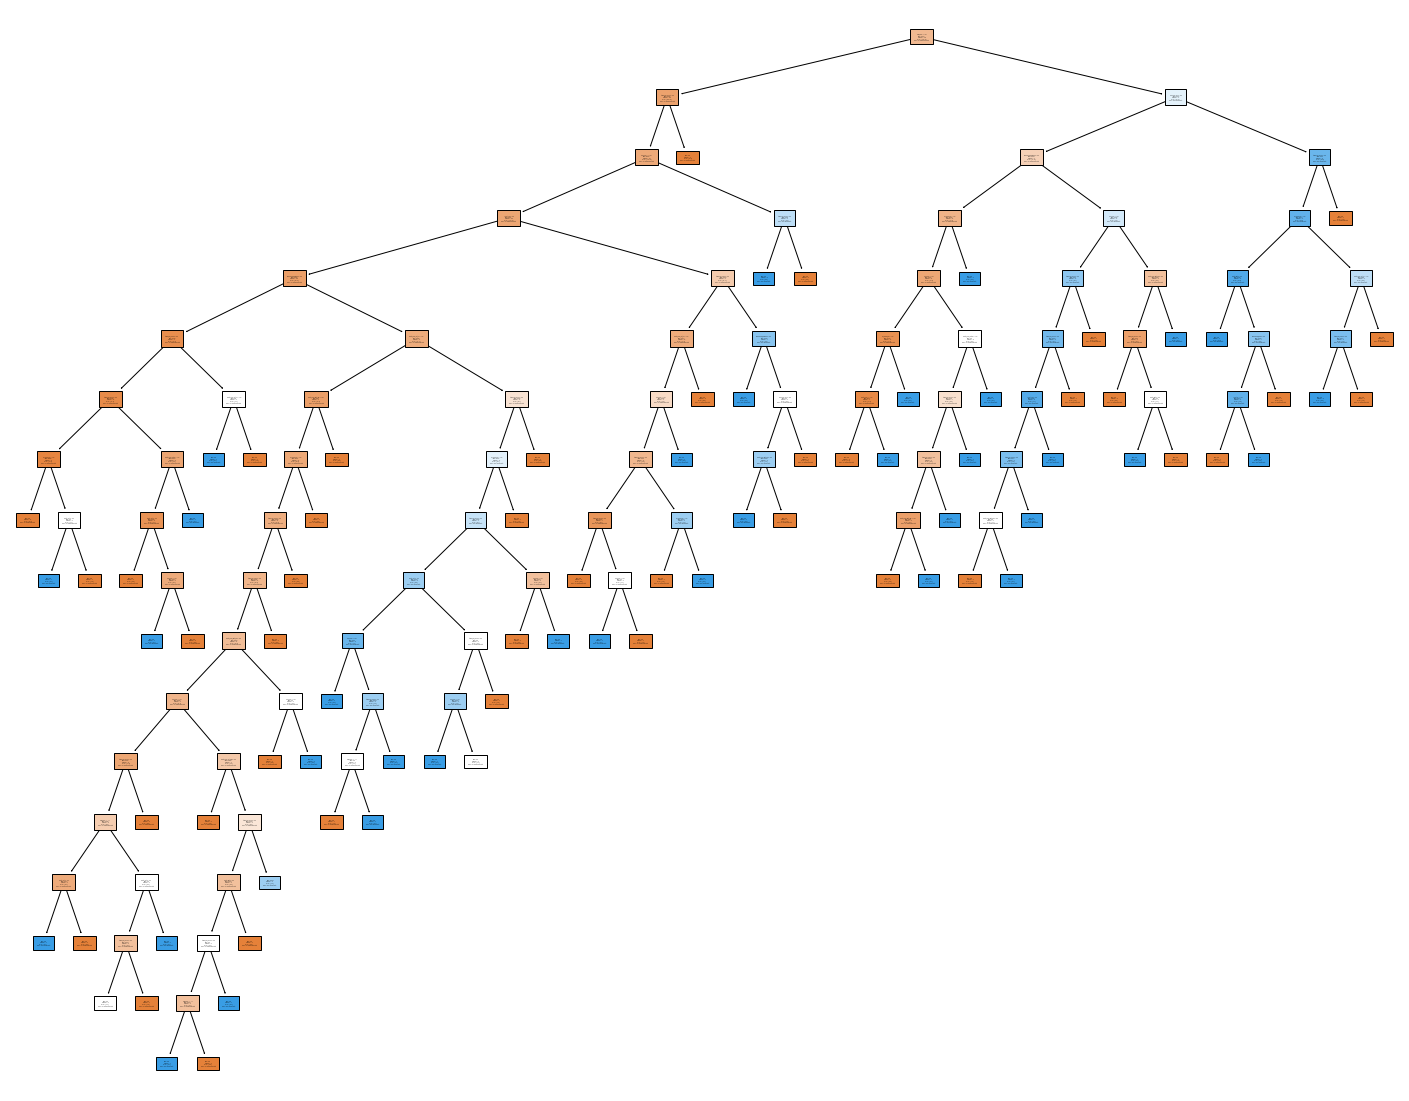

In [35]:
X = cancer_data.drop("class", axis=1)
y = cancer_data["class"]


X = pd.get_dummies(X, columns=['age','menopause','tumor_size', 'inv_nodes', 'node_caps', 'breast', 'breast_quad', 'irradiat'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
y_test_predict = dtree.predict(X_test)

print("Confusion Matrix Tree: \n", confusion_matrix(y_test, y_test_pred),"\n")
print("The Accuracy for Tree is: ", accuracy_score(y_test, y_test_pred))
print("The precision for Tree is ",precision_score(y_test, y_test_pred, pos_label="recurrence-events")) 
print("The recall for Tree is ",recall_score(y_test, y_test_pred, pos_label="recurrence-events"),"\n")  

fig = plt.figure(figsize=(25,20))
plot_tree(dtree, feature_names=X.columns, class_names=['no-recurrence-events', 'recurrence-events'], filled=True, fontsize=0)
plt.show()


Accuracy: 0.6896551724137931
Confusion Matrix:
 [[33  3]
 [15  7]]
Precision: 0.7
Recall: 0.3181818181818182


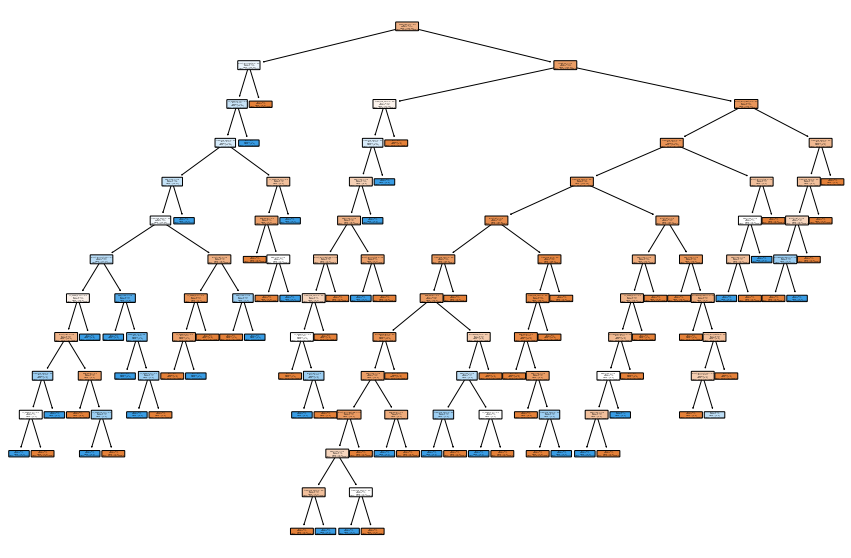

In [36]:
# Split the data into features (X) and target (y)
X = cancer_data.drop('class', axis=1)
y = cancer_data['class']

X = pd.get_dummies(X, columns=['age','menopause','tumor_size', 'inv_nodes', 'node_caps', 'breast', 'breast_quad', 'irradiat'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
precision = precision_score(y_test, y_pred, pos_label="recurrence-events")
recall = recall_score(y_test, y_pred, pos_label="recurrence-events")
print("Precision:", precision)
print("Recall:", recall)



fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names=X.columns,
          class_names=['no-recurrence-events', 'recurrence-events'], 
          filled=True, impurity=True, 
          rounded=True)
plt.show()
